In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction
# This project performs an exploratory data analysis (EDA) on a dataset of player injuries and their impact on match performance.

# 2. Loading and Inspecting Data
# Load the dataset
data = pd.read_csv('player_injuries_impact.csv')

# Display the first few rows
print("Dataset Overview:")
print(data.head())

# 6. Conclusion
# This analysis provides insights into the impact of player injuries on their performance and match outcomes. Future steps may include advanced statistical modeling or machine learning techniques.


Dataset Overview:
               Name  Team Name     Position  Age   Season  FIFA rating  \
0  Jamaal Lascelles  Newcastle  Center Back   26  2019/20           77   
1      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
2      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
3      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
4      Paul Dummett  Newcastle  Center Back   28  2019/20           75   

             Injury Date of Injury Date of return Match1_before_injury_Result  \
0       Knee injury    Nov 9, 2019   Jan 13, 2020                        draw   
1       Knee injury   Oct 20, 2019   Nov 24, 2019                        lose   
2  Hamstring strain    Jan 2, 2020   Jan 17, 2020                        lose   
3   Shoulder injury   Jul 16, 2020   Sep 28, 2020                        lose   
4      Groin injury   Dec 22, 2019   Jan 10, 2020                         win   

   ... Match1_after_injury_GD Match1_after_injury_

In [2]:
# Display dataset summary
print("\nData Summary:")
print(data.info())


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                656 non-null    object
 1   Team Name                           656 non-null    object
 2   Position                            656 non-null    object
 3   Age                                 656 non-null    int64 
 4   Season                              656 non-null    object
 5   FIFA rating                         656 non-null    int64 
 6   Injury                              656 non-null    object
 7   Date of Injury                      656 non-null    object
 8   Date of return                      656 non-null    object
 9   Match1_before_injury_Result         656 non-null    object
 10  Match1_before_injury_Opposition     656 non-null    object
 11  Match1_before_injury_GD             656 non

In [3]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Name                                  0
Team Name                             0
Position                              0
Age                                   0
Season                                0
FIFA rating                           0
Injury                                0
Date of Injury                        0
Date of return                        0
Match1_before_injury_Result           0
Match1_before_injury_Opposition       0
Match1_before_injury_GD               0
Match1_before_injury_Player_rating    0
Match2_before_injury_Result           0
Match2_before_injury_Opposition       0
Match2_before_injury_GD               0
Match2_before_injury_Player_rating    0
Match3_before_injury_Result           0
Match3_before_injury_Opposition       0
Match3_before_injury_GD               0
Match3_before_injury_Player_rating    0
Match1_missed_match_Result            0
Match1_missed_match_Opposition        0
Match1_missed_match_GD                0
Match2_missed_match_Res

In [4]:
# Cleaning Step: Standardize injury names
data['Injury'] = data['Injury'].str.lower()  # Convert all injury names to lowercase
data['Injury'] = data['Injury'].replace('hamstring injury', 'hamstring')  # Standardize duplicates

# Recalculate the injury counts
injury_counts = data['Injury'].value_counts()
print(injury_counts)

Injury
hamstring                      95
knee injury                    57
ankle injury                   52
calf injury                    41
muscle injury                  27
                               ..
achilles tendon irritation      1
shingles                        1
abdominal problems              1
ligament injury                 1
stress reaction of the bone     1
Name: count, Length: 103, dtype: int64


In [5]:
# 3. Data Cleaning
# Handle missing or inconsistent data
print("\nHandling Missing Values...")
data.fillna('N.A.', inplace=True)  # Example: Replace missing values with 'N.A.'

# Convert relevant columns to appropriate data types
print("\nConverting Data Types...")
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['FIFA rating'] = pd.to_numeric(data['FIFA rating'], errors='coerce')
data['Date of Injury'] = pd.to_datetime(data['Date of Injury'], errors='coerce')
data['Date of return'] = pd.to_datetime(data['Date of return'], errors='coerce')




Handling Missing Values...

Converting Data Types...


In [6]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)



In [7]:
# Verify cleaned data
print("\nCleaned Data Overview:")
print(data.head())


Cleaned Data Overview:
               Name  Team Name     Position  Age   Season  FIFA rating  \
0  Jamaal Lascelles  Newcastle  Center Back   26  2019/20           77   
1      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
2      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
3      Fabian Schär  Newcastle  Center Back   28  2019/20           79   
4      Paul Dummett  Newcastle  Center Back   28  2019/20           75   

             Injury Date of Injury Date of return Match1_before_injury_Result  \
0       knee injury     2019-11-09     2020-01-13                        draw   
1       knee injury     2019-10-20     2019-11-24                        lose   
2  hamstring strain     2020-01-02     2020-01-17                        lose   
3   shoulder injury     2020-07-16     2020-09-28                        lose   
4      groin injury     2019-12-22     2020-01-10                         win   

   ... Match1_after_injury_GD Match1_after_i

In [8]:

# 4. Exploratory Analysis
# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))



Summary Statistics:
                 Name  Team Name     Position         Age   Season  \
count             656        656          656  656.000000      656   
unique            224          8           14         NaN        5   
top     Callum Wilson  Newcastle  Center Back         NaN  2019/20   
freq               11        120          125         NaN      170   
mean              NaN        NaN          NaN   26.661585      NaN   
min               NaN        NaN          NaN   18.000000      NaN   
25%               NaN        NaN          NaN   24.000000      NaN   
50%               NaN        NaN          NaN   27.000000      NaN   
75%               NaN        NaN          NaN   29.000000      NaN   
max               NaN        NaN          NaN   39.000000      NaN   
std               NaN        NaN          NaN    3.580028      NaN   

        FIFA rating     Injury                 Date of Injury  \
count    656.000000        656                            573   
unique  

In [9]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate and display the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_data.corr())



Correlation Matrix:
                  Age  FIFA rating
Age          1.000000     0.312038
FIFA rating  0.312038     1.000000


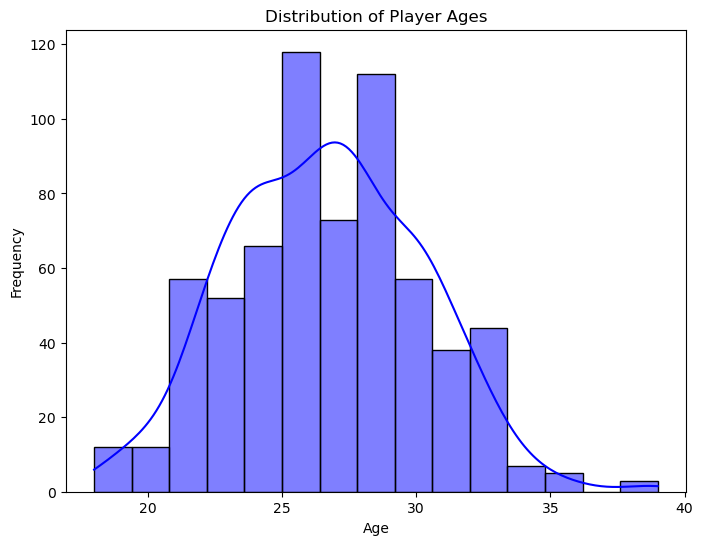

In [10]:
# 5. Visualization
# Visualize distribution of player ages
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True, color='blue', bins=15)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


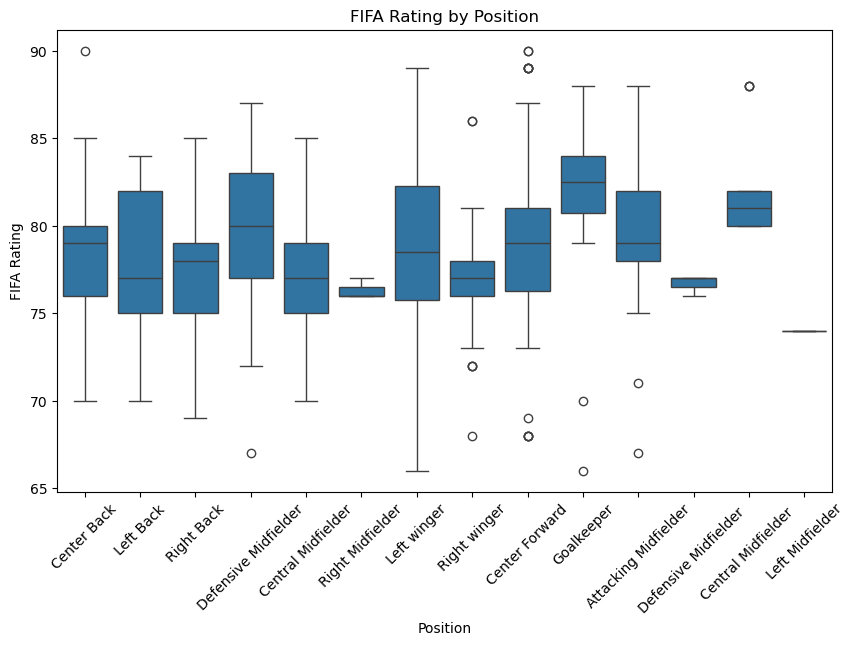

In [11]:

# FIFA Rating vs. Position
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='FIFA rating', data=data)
plt.title('FIFA Rating by Position')
plt.xlabel('Position')
plt.ylabel('FIFA Rating')
plt.xticks(rotation=45)
plt.show()

In [21]:
# # Convert injury counts to a DataFrame for a heatmap
# injury_df = injury_counts.reset_index()
# injury_df.columns = ['Injury Type', 'Count']

# # Pivot data to create a single-row heatmap
# injury_pivot = injury_df.pivot_table(index=None, columns='Injury Type', values='Count')

# # Plot the heatmap
# plt.figure(figsize=(15, 4))
# sns.heatmap(injury_pivot, annot=False, cmap='viridis', cbar=True)
# # plt.title('Heatmap of Injury Counts')
# plt.show()


In [23]:

# # Pivot data to create a single-row heatmap
# injury_pivot = injury_df.pivot_table(index=None, columns='Injury Type', values='Count')

# # Plot the heatmap with a better colormap
# plt.figure(figsize=(15, 4))
# sns.heatmap(injury_pivot, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)
# plt.title('Heatmap of Injury Counts with Enhanced Colors')
# plt.xlabel('Injury Type')
# plt.ylabel('')
# plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
# plt.tight_layout()
# plt.show()



C:\Users\kasuc\AppData\Local\Temp\ipykernel_23028\569921107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_injuries.index, y=top_injuries.values, palette='viridis')


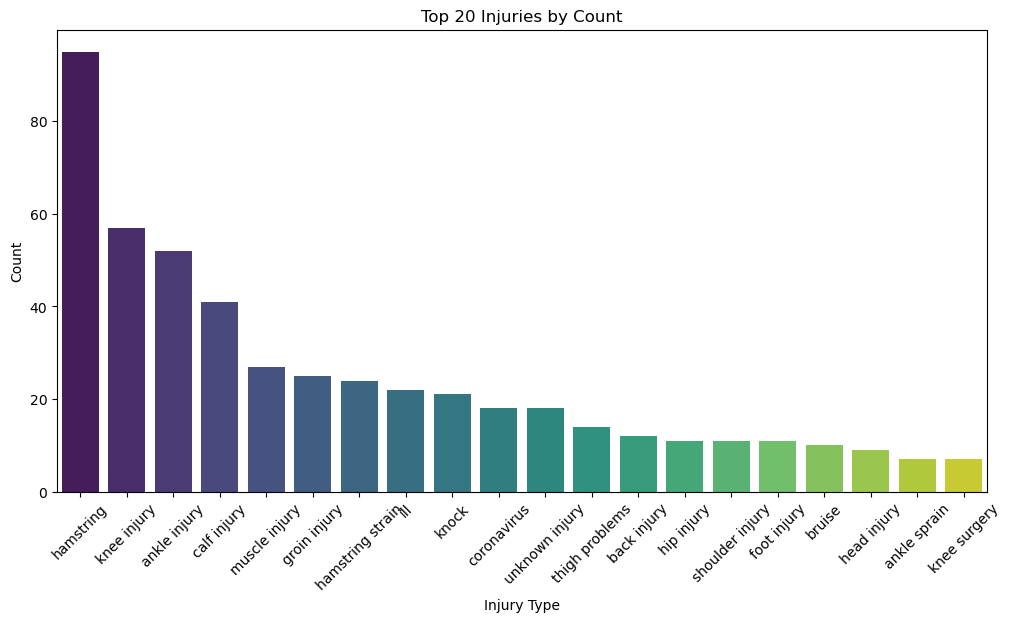

In [17]:
# Split the data into two parts: top 20 and the rest
top_injuries = injury_counts[:20]
other_injuries = injury_counts[20:]

# Plot top 20 injuries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_injuries.index, y=top_injuries.values, palette='viridis')
plt.title('Top 20 Injuries by Count')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# # Plot the remaining injuries
# plt.figure(figsize=(12, 6))
# sns.barplot(x=other_injuries.index, y=other_injuries.values, palette='magma')
# plt.title('Remaining Injuries by Count')
# plt.xlabel('Injury Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()


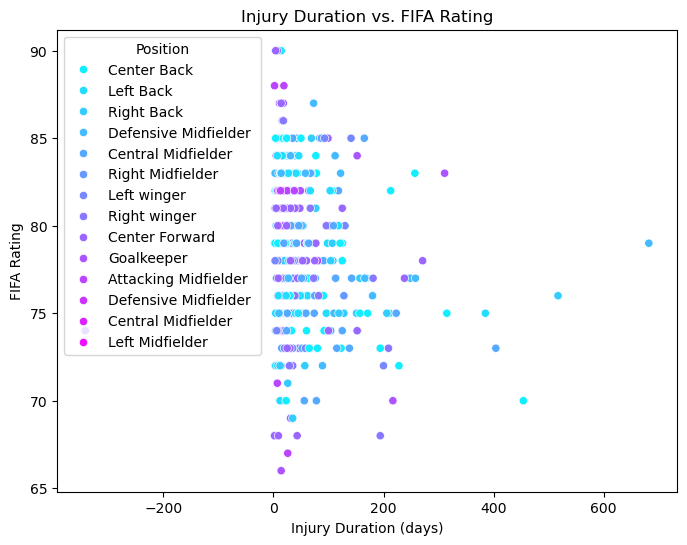

In [19]:



# Relationship between injury duration and FIFA rating
plt.figure(figsize=(8, 6))
data['Injury Duration'] = (data['Date of return'] - data['Date of Injury']).dt.days
sns.scatterplot(x='Injury Duration', y='FIFA rating', data=data, hue='Position', palette='cool')
plt.title('Injury Duration vs. FIFA Rating')
plt.xlabel('Injury Duration (days)')
plt.ylabel('FIFA Rating')
plt.show()

In [46]:
# plt.figure(figsize=(10, 6))
# plt.hexbin(data['Injury Duration'], data['FIFA rating'], gridsize=30, cmap='viridis', mincnt=1)
# plt.colorbar(label='Count')
# plt.title('Hexbin Plot: Injury Duration vs. FIFA Rating')
# plt.xlabel('Injury Duration (days)')
# plt.ylabel('FIFA Rating')
# plt.show()
